<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Описание данных:
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- open_plan — свободная планировка (булев тип)
- studio — квартира-студия (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В датафрейме:
- 23699 строк, 22 колонки
- есть пропуски в колонках *ceiling_height*, *floors_total*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *locality_name*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*, *days_exposition*
- данные имеют тип bool, float64, int64, object
- есть колонка с датой, нужно привести её к типу datetime

## Предобработка данных

Изменю название колонки *cityCenters_nearest* на *city-centers_nearest*

In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

**Количество пропущенных значений**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков очень много. В колонке *is_apartment* количество пропусков превышает 20000. Надо их заполнить.

**Пропуски в колонке *высота потолка***

In [7]:
# высота потолка
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Высота потолка у большинства квартир находиться в районе 3 метров. Но есть значения, которые выбиваются: 10, 14, 22, 25, 27, 32 и 100 метров. Допустим, что высота потолка не должна превышать 10 метров, вдруг квартира жвухэтажная.

Возможно пользователь не поставил запятую, поэтому получились значения 25, 27... В остальных случаях пользователь опечатался.

Так же высота потолка не должна быть слишком маленькой, введу минимальное значение высоты потолка 2,2 м.

Пустые значения заполню средним занчением по *ceiling_height*.

In [8]:
data['ceiling_height'].mean()

2.77149889685604

In [9]:
def ceiling_height_change(row):
    """Если высота потолка в пределах нормы (2,2-10 метров), то возвращается изначальное число.
    если высота потолка 25-100 метров, то это число делится на 10. Все остальные числа 
    заменяются средним значением"""
    if 2.2 <= row <= 10:
        return row
    elif 22 <= row <= 100:
        return row/10
    else:
        return 2.7
    

In [10]:
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_change)

In [11]:
print(data['ceiling_height'].min())
data['ceiling_height'].max()

2.2


10.0

In [12]:
data['ceiling_height'] = round(data['ceiling_height'], 1)

In [13]:
data['ceiling_height'].isna().sum()

0

В колонке *ceiling_height* (высота потолка) нет пропусков и аномальных значений

**Пропуски в колонке *количество этажей в доме***

In [14]:
print(data['floors_total'].min())
data['floors_total'].max()

1.0


60.0

Отрицательных чисел нет.

Пустые значения не заполняю, так как невозможно восстановить их точное значение.

**Пропуски в *living_area* жилая площадь и в колонке *is_apartment***

In [15]:
# квартиры, в которых отсутствует жилая площадь и они являются аппартаментами
len(data[(data['living_area'].isna()) & (data['is_apartment'] == True)])

8

В этом случаи жилую площадь заполним 0, так как в аппартаментах не жилая площадь

In [16]:
data.loc[((data['is_apartment'] == True) & (data['living_area'].isna())), 'living_area'] = 0

In [17]:
# Квартиры, в которых не заполнина жилая площадь и она не аппартаменты
len(data[(data['living_area'].isna()) & (data['is_apartment'] == False)])

112

Есть колонка *total_area* вся площадь квартиры и жилая площадь квартиры составляет какую-то часть от общай площади квартиры.

In [18]:
(data['living_area'] / data['total_area']).mean()

0.5645583063180357

Жилая площадь квартиры составляет примерно 60% от общей плащади

In [19]:
# Квартиры, которые не аппартаменты, заполню пропуски в жилой площади, как 60% от общей площади
data.loc[((data['living_area'].isna()) & (data['is_apartment'] == False)), 'living_area'] = data['total_area'] * 0.6

In [20]:
# квартиры где указана жилая площадь и пропуск в аппартаментах
len(data[(data['living_area'] > 0) & (data['is_apartment'].isna())])

19141

Если есть жилая площадь, значит это не аппартаменты. Я заполню эти строки в колоке *is_apartment* значением False

In [21]:
data.loc[((data['living_area'] > 0) & (data['is_apartment'].isna())), 'is_apartment'] = False

In [22]:
data['is_apartment'].isna().sum()

1783

In [23]:
data['living_area'].isna().sum()

1783

In [24]:
len(data[(data['living_area'].isna())&(data['is_apartment'].isna())])

1783

Осталось одинаковое количество пропусков в жилой площади и в аппартаментах. Предположу, что все эти квартиры аппартаменты, так как продавец квартиры не заполнил жилую площадь.

In [25]:
data.loc[((data['living_area'].isna()) & (data['is_apartment'].isna())), 'living_area'] = 0

In [26]:
data.loc[((data['living_area'] == 0) & (data['is_apartment'].isna())), 'is_apartment'] = True

In [27]:
data['is_apartment'].isna().sum()

0

In [28]:
data['living_area'].isna().sum()

0

Пропуски в колонках *living_area*, *is_apartment*, устранила.
- если была указана жилая площадь, то в аппартаментах поставила False
- если было указано, что квартира не аппартаменты, то поставила жилую площадь = 60% от общей площади.
- если было указано, что квартира аппартаменты, то в жилой площади поставила 0
- если не указана жилая площадь и аппартаменты, то поставила жилая площадь=0, аппартаменты=True

**Пропуски в *kitchen_area* - площадь кухни**

In [29]:
print(data['kitchen_area'].min())
data['kitchen_area'].max()

1.3


112.0

В датасете есть СТУДИИ - это квартиры без кухни, поэтому у них площадь кухни поставлю 0.

In [30]:
len(data[(data['kitchen_area'].isna()) & (data['studio'] == True)])

149

In [31]:
data.loc[((data['kitchen_area'].isna()) & (data['studio'] == True)), 'kitchen_area'] = 0

Определю какой процент в среднем площадь кухни занимает от общей площади квартиры.

In [32]:
(data[data.kitchen_area != 0]['kitchen_area'] / data[data.kitchen_area != 0]['total_area']).mean()

0.18735473877174058

Площадь кухни составляет примерно 18-19% от всей площади квартиры.

In [33]:
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data['total_area'] * 0.187

In [34]:
data['kitchen_area'].isna().sum()

0

Пропуски в колонке *kitchen_area* (площадь кухни) отсутсвуют. Заполнила их значением = 18,7% от общей площади квартиры.

**Пропуски в колонке *balcony* - балкон**

In [35]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Я думаю, продавец не указал число балконов, потому что балконов нет в квартире. Балкон - важная составляющая квартиры, поэтому если бы он был, продавец бы указал.

In [36]:
data.loc[(data['balcony'].isna()), 'balcony'] = 0

In [37]:
data['balcony'].isna().sum()

0

Все балконы на месте, аномальных значений нет

**Пропуски в колонке *locality_name* - название населенного пункта**

In [38]:
data['locality_name'] = data['locality_name'].str.lower()

In [39]:
data['locality_name'].isna().sum()

49

In [40]:
len(data['locality_name'].unique())

365

Населенных пунктов очень много, возможно некоторые повторяются. Так как невозможно вычислить из датафрейма в каком населенном пункте расположена квартира, поэтому заполню пропуски строкой 'Неизвестно'. Таких строк получится не много, всего 49, может потом они не потребуются в анализе.

In [41]:
data.loc[(data['locality_name'].isna()), 'locality_name'] = 'неизвестно'

In [42]:
data['locality_name'].isna().sum()

0

In [43]:
data[data['locality_name'] == 'неизвестно'].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.6,5.0,50.8,2,False,...,8.8,0.0,неизвестно,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.7,4.0,42.6,2,False,...,18.6,0.0,неизвестно,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.7,24.0,15.6,3,False,...,10.7,0.0,неизвестно,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.7,24.0,33.1,21,False,...,8.2,0.0,неизвестно,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.7,5.0,30.8,5,False,...,6.5,0.0,неизвестно,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Населунных пуктов много, разделю их на группы: 
- *административный центр*
- *город*
- *поселок городского типа*
- *поселок*
- *деревня*
- *садовое товарищество*
- *село*

In [44]:
def type_of_settlement(row):
    lemmas = m.lemmatize(row)
    if 'неизвестно' in lemmas:
        return 'неизвестно'
    elif ('санкт-петербург' in lemmas) or ('питер' in lemmas) or ('петербург' in lemmas):
        return 'административный центр'
    elif (('поселок' not in lemmas) and ('деревня' not in lemmas) 
        and ('садовый' not in lemmas) and ('село' not in lemmas)):
        return 'город'
    elif ('поселок' in lemmas) and ('городской' in lemmas):
        return 'поселок городского типа'
    elif 'поселок' in lemmas:
        return 'поселок'
    elif 'деревня' in lemmas:
        return 'деревня'
    elif 'садовый' in lemmas:
        return 'садовое товарищество'
    elif 'село' in lemmas:
        return 'село'

In [45]:
data['type_settlement'] = data['locality_name'].apply(type_of_settlement)

In [46]:
data['type_settlement'].isna().sum()

0

In [47]:
data['type_settlement'].value_counts()

административный центр     15721
город                       4110
поселок                     2110
деревня                      945
поселок городского типа      550
село                         210
неизвестно                    49
садовое товарищество           4
Name: type_settlement, dtype: int64

Остались колонки с пропусками:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - *5542 пропусков*
- cityCenters_nearest — расстояние до центра города (м) - *5519 пропусков*
- parks_around3000 — число парков в радиусе 3 км - *5518 пропусков*
- parks_nearest — расстояние до ближайшего парка (м) - *15620 пропусков*
- ponds_around3000 — число водоёмов в радиусе 3 км - *5518 пропусков*
- ponds_nearest — расстояние до ближайшего водоёма (м) - *14589 пропусков*
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) - *3181 пропусков*

Возможно продавец не указал растояние до обьекта(парк, аэропорт), количество парковочных мест, потому что не владеет этой информацией или объекты так далеки, что не тсмысла указывать.

В колонке *days_exposition* есть пропуски, потому что объявление еще не было снято с публикации.

**Пропуски в колонках *parks_around3000, ponds_around3000***

В этих колонках заполню пропуски 0. Думаю, что продавец не указал количество парков и водоемов в радиусе 3 км, потому что этих объектов нет поблизости.

In [48]:
data.loc[(data['parks_around3000'].isna()), 'parks_around3000'] = 0

In [49]:
data.loc[(data['ponds_around3000'].isna()), 'ponds_around3000'] = 0

Остальные пропуски пока оставлю как есть, так как не вижу чем их можно заполнить, что бы это не повлияло на дольнейшие вычисления

In [50]:
# Промежуточные итоги заполнения пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
type_settlement             0
dtype: int64

In [51]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,административный центр
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.7,11.0,18.6,1,False,...,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.7,5.0,34.3,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,административный центр
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7,14.0,0.0,9,True,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,административный центр
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,административный центр


В колонках *balcony*, *parks_around3000*, *ponds_around3000* поменяю тип данных на int, так как в этих колонках длжны быть целые числа

In [52]:
data['balcony'] = data['balcony'].astype('int')

In [53]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [54]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

**Количество комнат**

In [55]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

В датасете есть квартиры студии - это квартиры без комнат. 

Так же есть квартиры со свободной планировкой - это пространство, в которых отсутсвуют внутренние стены.

Т.е. у таких квартир нет комнат.

In [56]:
# Количество квартир, где нет комнат
len(data[data['rooms'] == 0])

197

Проверю относятся ли эти квартиры к студии и есть ли свободная планировка

In [57]:
len(data[(data['rooms'] == 0) & ((data['studio'] == True) | (data['open_plan'] == True))])

197

В этих квартирах и правда нет комнат, ноли оставляю как есть.

**Дубликаты**

In [58]:
data.duplicated().sum()

0

## Расчёты и добавление результатов в таблицу

In [59]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,административный центр
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.7,11.0,18.6,1,False,...,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.7,5.0,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,административный центр
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7,14.0,0.0,9,True,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,административный центр
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,административный центр


**Количество фотографий в объявлении**

In [60]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

**Стоимость одного квадратного метра**

Для каждой квартиры расчитаю стоимость 1го квадратного метра.

Стоимость квартиры поделю на общую площадь квартиры

In [61]:
data['price_square_meter'] = data['last_price'] / data['total_area']

In [62]:
data['price_square_meter'].isna().sum()

0

**Дата публикации**

Дата представлена в виде строки, приведу дату к типу datetime

In [63]:
data['day_exposition_datetime'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [64]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_square_meter,day_exposition_datetime
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,административный центр,120370.370370,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.7,11.0,18.6,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок,82920.792079,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.7,5.0,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,административный центр,92785.714286,2015-08-20
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7,14.0,0.0,9,True,...,28098.0,6800.0,2,84.0,3,234.0,424.0,административный центр,408176.100629,2015-07-24
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,административный центр,100000.000000,2018-06-19


Создам в таблице колонки: день недели, месяц и год публикации объявления

In [65]:
data['publication_day'] = data['day_exposition_datetime'].dt.day

In [66]:
data['month_of_publication'] = data['day_exposition_datetime'].dt.month

In [67]:
data['year_of_publication'] = data['day_exposition_datetime'].dt.year

In [68]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_square_meter,day_exposition_datetime,publication_day,month_of_publication,year_of_publication
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,482.0,2,755.0,NaN,административный центр,120370.370370,2019-03-07,7,3,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.7,11.0,18.6,1,False,...,NaN,0,NaN,81.0,поселок,82920.792079,2018-12-04,4,12,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.7,5.0,34.3,4,False,...,90.0,2,574.0,558.0,административный центр,92785.714286,2015-08-20,20,8,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7,14.0,0.0,9,True,...,84.0,3,234.0,424.0,административный центр,408176.100629,2015-07-24,24,7,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,112.0,1,48.0,121.0,административный центр,100000.000000,2018-06-19,19,6,2018


Добавлю колонку с характеристикой этажа квартиры:
- первый
- последний
- другой

In [69]:
def apartment_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [70]:
data['flat_floor'] = data.apply(apartment_floor, axis=1)

In [71]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,type_settlement,price_square_meter,day_exposition_datetime,publication_day,month_of_publication,year_of_publication,flat_floor
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,2,755.0,NaN,административный центр,120370.370370,2019-03-07,7,3,2019,другой
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.7,11.0,18.6,1,False,...,0,NaN,81.0,поселок,82920.792079,2018-12-04,4,12,2018,первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.7,5.0,34.3,4,False,...,2,574.0,558.0,административный центр,92785.714286,2015-08-20,20,8,2015,другой
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7,14.0,0.0,9,True,...,3,234.0,424.0,административный центр,408176.100629,2015-07-24,24,7,2015,другой
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,1,48.0,121.0,административный центр,100000.000000,2018-06-19,19,6,2018,другой


In [72]:
data['flat_floor'].value_counts()

другой       17446
последний     3336
первый        2917
Name: flat_floor, dtype: int64

## Исследовательский анализ данных

**Иследование площади, цены, числа комнат, высоты потолков**

1. Диаграмма рассеивания цены за кв.метр и высоты потолков

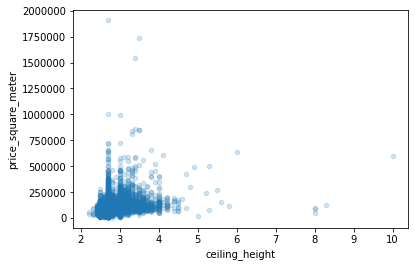

In [73]:
data.plot(x='ceiling_height', y='price_square_meter', kind='scatter', alpha=0.2)

In [74]:
data['ceiling_height'].corr(data['price_square_meter'])

0.28127306979262645

Между стоимостью квадратного метра и высоты потолка квартиры есть слабая положительная корреляция.

При росте высоты потолка растет и цена за квадратный метр.

Высота потолка больше 4х метров, встречается редко

2. График цены за кв.метр и числа комнат

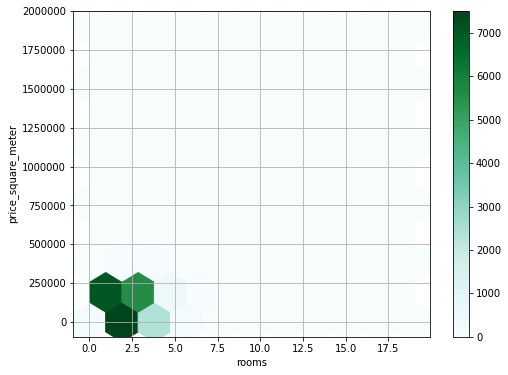

In [75]:
data.plot(x='rooms', y='price_square_meter', kind='hexbin', gridsize=10, figsize=(8,6), sharex=False, grid=True)

In [76]:
data['price_square_meter'].corr(data['rooms'])

0.05541965593528785

Если в квартире 1-3 комнаты, это влияет на цену квартиры. Видимо потому что такие квартиры больше всего востребованны. В остальных случиях влияение количества комнат на цену квартиры нет.

Между количеством комнат и ценой за квадратный метр корреляция очень слабая. 

3. Диаграмма рассеивания цены за кв.метр и площади квартиры

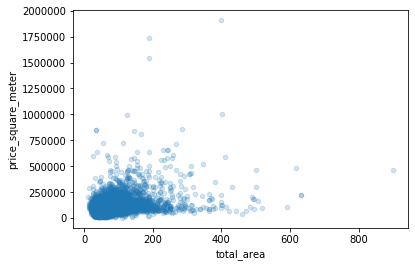

In [77]:
data.plot(x='total_area', y='price_square_meter', kind='scatter', alpha=0.2)

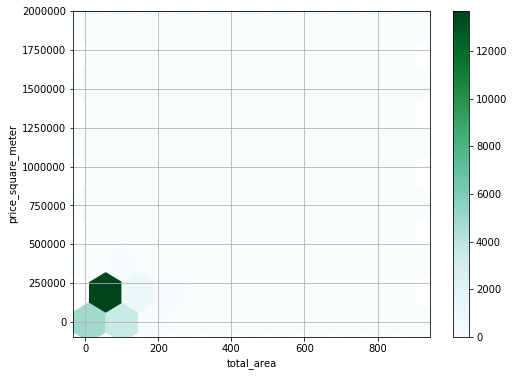

In [78]:
data.plot(x='total_area', y='price_square_meter', kind='hexbin', gridsize=10, figsize=(8,6), sharex=False, grid=True)

График похож на график числа комнат. Потому что число комнат зависит от площади квартиры.
Площадь квартиры до 100 кв.мет. коррелируется со стоимостью одного квадратного метра.

In [79]:
data['price_square_meter'].corr(data['total_area'])

0.30196021001472556

Промежуточный выводы, по неочищенным данным влиение, характеристик квартиры на цену одного квадратного метра:
- наблюдается слабая положительная корреляция между высотой потолка. Чем выше потолок, тем больше цена за квадратный метр
- число комнат коррелируется только в диапазоне 1-3 комнаты
- квартиры площадью до 100 метров (это и есть квартиры с 1-3 комнатами), оказывают больше влияние на стоимость квадратного метра, потому что это самые востребованные квартиры.

**Иследование как количество времени влияет на продажу квартиры**

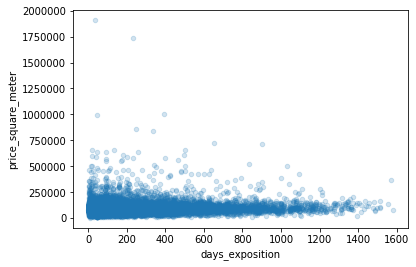

In [80]:
data.plot(x='days_exposition', y='price_square_meter', kind='scatter', alpha=0.2)

In [81]:
data['price_square_meter'].corr(data['days_exposition'])

0.048120061392986066

Количество времени не влияет на стоимость квадратного метра. Корреляция меньше одной десятой.

In [82]:
data['total_area'].corr(data['days_exposition'])

0.14967517208715722

Есть небольшая корреляция между площадью квартиры и количеством времени продажи квартиры.

При росте площади квартиры, растет и время её продажи.

In [83]:
data.corr()['price_square_meter']

total_images            0.132780
last_price              0.736499
total_area              0.301960
rooms                   0.055420
ceiling_height          0.281273
floors_total            0.148098
living_area             0.198040
floor                   0.129068
is_apartment            0.001094
studio                  0.015636
open_plan               0.008266
kitchen_area            0.378348
balcony                 0.023376
airports_nearest       -0.038734
city_centers_nearest   -0.317951
parks_around3000        0.291687
parks_nearest           0.006933
ponds_around3000        0.304363
ponds_nearest          -0.104974
days_exposition         0.048120
price_square_meter      1.000000
publication_day         0.012490
month_of_publication   -0.001995
year_of_publication     0.008516
Name: price_square_meter, dtype: float64

На стоимость квадратного метра влиет:
- total_images - количество фотографий в обьявлении, слабая корреляция
- total_area - общая площадь
- ceiling_height - высота потолка
- living_area - жтлая площадь
- kitchen_area - размер кухни, чеб больше кухня, тем больше цена
- city_centers_nearest - удаленость от центра, чем дольше от центра, тем дешевле квадратный метр
- parks_around3000, ponds_around3000 - наличие парка, водоема поблизости увелтчивает стоимость квадратного метра

**Анализ редких и выбивающихся значений**

Нужно очистить данные от выбросов и редких значей и заново провести иследование.

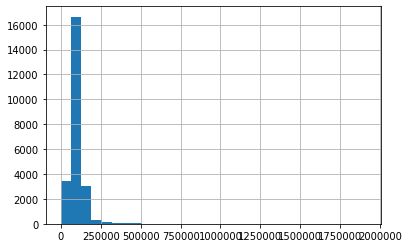

In [84]:
data['price_square_meter'].hist(bins=30)

Есть пик в значении примерно 100 000 за квадратный метр.

Так же есть небольшое число квартир с очень дорогим квадратным метром.

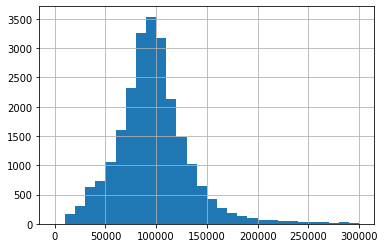

In [85]:
data['price_square_meter'].hist(bins=30, range=(0, 300000))

График похож на нормальное распределение.

Наиболее частое значение 90 000 за квадратный метр

**Диаграама размаха значений стоимости 1го квадратного метра**

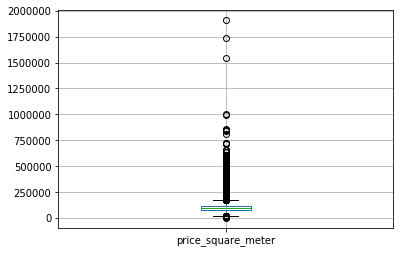

In [86]:
data.boxplot('price_square_meter')

На графике выбросы обозначены точнками. Их можно не учитывать в вычислении.

Построю диаграмму размаха без выбросов.

In [87]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_day,month_of_publication,year_of_publication
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.720435,10.673824,31.851205,5.892358,10.538089,0.591080,...,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634,9.942166e+04,15.481582,6.400101,2017.367146
std,5.682529,1.088701e+07,35.654083,1.078405,0.233710,6.597173,23.033593,4.885249,6.134602,0.959298,...,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988,5.030680e+04,8.642389,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,0.000000,1.000000,0.000000,0.000000,...,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,1.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,17.925000,2.000000,7.000000,0.000000,...,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,8.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,29.000000,4.000000,9.050000,0.000000,...,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000,9.500000e+04,15.000000,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.300000,8.000000,12.000000,1.000000,...,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,23.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,31.000000,12.000000,2019.000000


In [88]:
# Q1
7.658550 * 10**4

76585.5

In [89]:
# Q2 - медиана
9.500000 * 10**4

95000.0

In [90]:
# Q3
1.142560 * 10**5

114256.0

Очищаю данный по столбцу *price_square_meter*, мин.значение = 24100, макс.значение = 163000

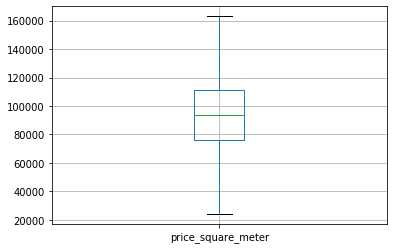

In [91]:
data.query('price_square_meter > 24100 and price_square_meter < 163000').boxplot('price_square_meter')

In [92]:
data.query('price_square_meter > 24100 and price_square_meter < 163000').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_day,month_of_publication,year_of_publication
count,22323.000000,2.232300e+04,22323.000000,22323.000000,22323.000000,22242.000000,22323.000000,22323.000000,22323.000000,22323.000000,...,17075.000000,22323.000000,7306.000000,22323.000000,8315.000000,19480.000000,22323.000000,22323.000000,22323.000000,22323.000000
mean,9.757335,5.487654e+06,58.089045,2.041571,2.708767,10.794938,30.911394,5.921382,10.122844,0.594275,...,14665.689429,0.442458,488.229400,0.555839,527.565484,178.256622,93404.059750,15.469964,6.403530,2017.367558
std,5.623034,3.666076e+06,30.387498,1.055604,0.213135,6.644214,20.764262,4.918396,5.188510,0.957954,...,8581.415424,0.723882,329.862124,0.848404,277.382578,217.179797,27613.328090,8.645806,3.489479,1.032905
min,0.000000,6.500000e+05,13.000000,0.000000,2.200000,1.000000,0.000000,1.000000,0.000000,0.000000,...,215.000000,0.000000,1.000000,0.000000,13.000000,1.000000,24137.931034,1.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,17.845000,2.000000,7.000000,0.000000,...,10097.000000,0.000000,289.000000,0.000000,309.000000,44.000000,76190.476190,8.000000,3.000000,2017.000000
50%,9.000000,4.540000e+06,51.000000,2.000000,2.700000,9.000000,29.000000,4.000000,9.000000,0.000000,...,13390.000000,0.000000,456.000000,0.000000,515.000000,94.000000,93750.000000,15.000000,6.000000,2017.000000
75%,14.000000,6.400000e+06,67.500000,3.000000,2.700000,16.000000,40.415000,8.000000,11.533950,1.000000,...,16566.000000,1.000000,612.000000,1.000000,738.000000,228.000000,110925.925926,23.000000,10.000000,2018.000000
max,50.000000,6.500000e+07,590.000000,19.000000,8.300000,60.000000,409.000000,33.000000,100.700000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,162962.962963,31.000000,12.000000,2019.000000


После очистки данных от выбросов межквартильный размер изменился.

Стало:
- Q1 = 76190
- медиана = 93750
- Q3 = 110926

Усы ящика заканчиваются в точках min = 24138, max = 162963

Буду дальше работать с очищенными данными от выбросов.

In [93]:
data_new = data.query('price_square_meter > 24100 and price_square_meter < 163000')

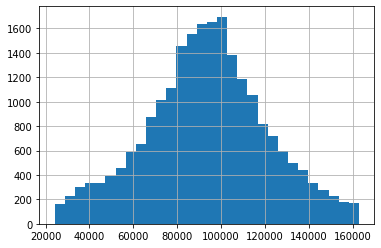

In [94]:
data_new['price_square_meter'].hist(bins=30)

Построю гистограммы других показателей по квартирам.

In [95]:
columns_new = ['total_images', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 
               'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 
               'city_centers_nearest','parks_around3000', 'parks_nearest', 
               'ponds_around3000', 'ponds_nearest', 'days_exposition']

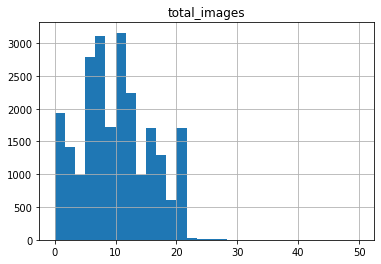

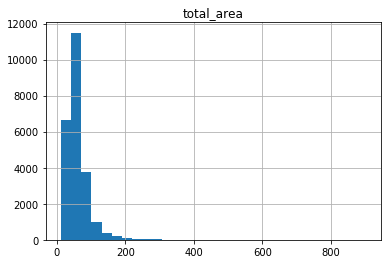

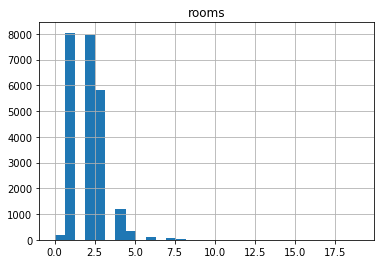

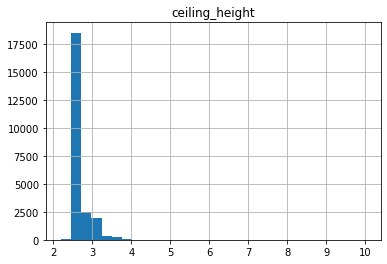

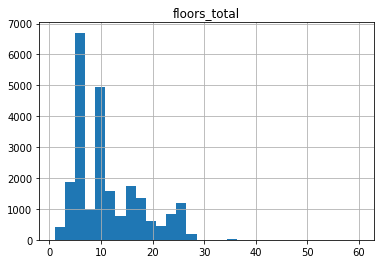

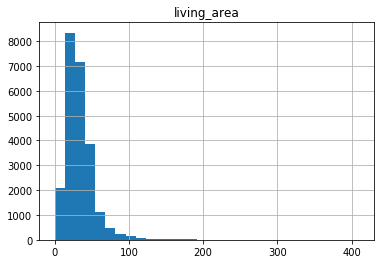

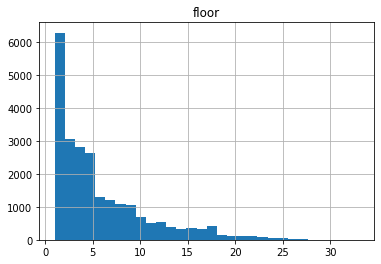

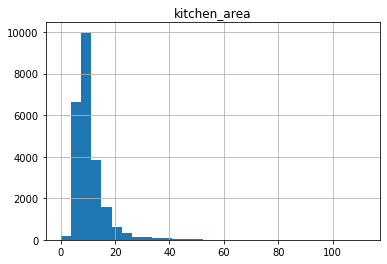

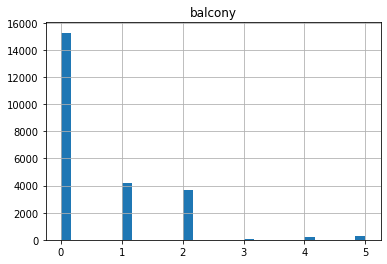

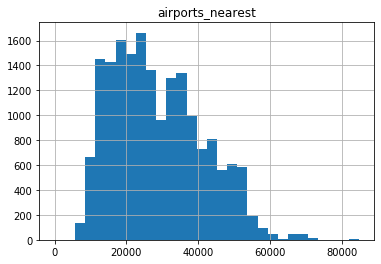

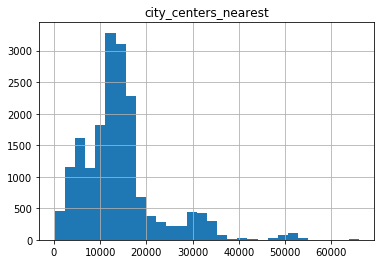

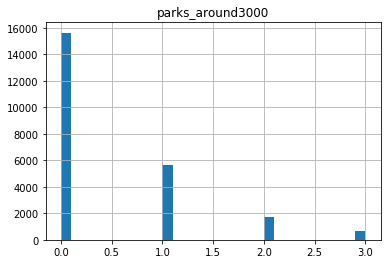

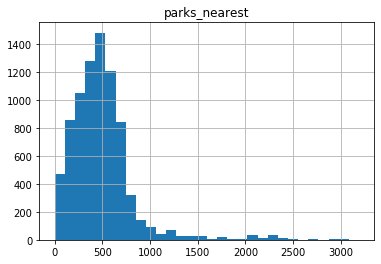

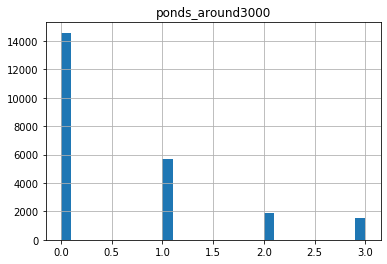

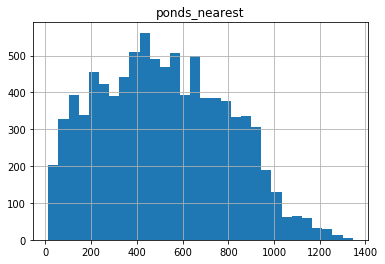

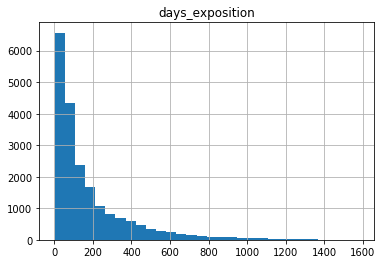

In [96]:
for column in columns_new:
    data.hist(column, bins=30)

Редкие значения в колонке *total_images* - количество фотографий

In [97]:
data['total_images'].value_counts(ascending=True).head(10)

42    1
25    1
39    1
37    1
27    2
30    2
35    2
31    2
29    3
50    3
Name: total_images, dtype: int64

В колонке total_area (общая площадь квартиры) редкие значения, аномально большие начинаются примерно с 300 кв.мет.

Выбросы в колонке *rooms* (число комнат) начинаются с 7ми комнат.

Количество комнат связано с площадью квартиры. Больше площадь, больше комнат и такие квартиры встречаются реже. Можно их отнести к выбросам.

In [98]:
data['rooms'].value_counts(ascending=True).head(13)

15      1
16      1
12      1
19      1
11      2
14      2
10      3
9       8
8      12
7      59
6     105
0     197
5     326
Name: rooms, dtype: int64

В колонке *ceiling_height* (высота потолка) редкие занчения начинаются после 4 метров. Высокие потолки обычно  в больших квартирах и домах(с большой площадью). Все что больше 4х - выброс.

В колонке *living_area* (жилая площадь) редкие значения начинаются примерно со 150 метров.

Редкие значения в *kitchen_area* (площадь кухни) после 30-40 кв.мет.

Редкие значения в *floors_total*(высота здания) начинаюся с 30 этажей. Этот разброс на анализ ни как не повлияет. Как и разброс в колонке *floor*

Число балконов *balcony*, все что больше 2х, является выбросом.

In [99]:
data['balcony'].value_counts(ascending=True)

3       81
4      183
5      304
2     3659
1     4195
0    15277
Name: balcony, dtype: int64

Выбросы удаляю в колонках:
- total_area < 300
- rooms <= 6
- ceiling_height <= 4
- living_area <= 150
- kitchen_area <= 40
- balcony <= 2

То есть чищу данные от очень больших и дорогих квартир

In [100]:
data_new = data_new.query('total_area < 300 and rooms <= 6 and ceiling_height <= 4 and living_area <= 150 and kitchen_area <= 40 and balcony <= 2')

In [101]:
data_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_day,month_of_publication,year_of_publication
count,21607.00000,2.160700e+04,21607.000000,21607.000000,21607.000000,21526.000000,21607.000000,21607.000000,21607.000000,21607.000000,...,16484.000000,21607.000000,7003.000000,21607.000000,8018.000000,18917.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,9.71338,5.293986e+06,56.293238,1.997038,2.702883,10.791043,29.936419,5.896654,9.877497,0.505253,...,14712.872300,0.437636,487.844924,0.552321,529.114991,177.404081,93209.579043,15.466284,6.406072,2017.366826
std,5.59527,3.167058e+06,25.051906,0.977953,0.186972,6.644628,18.114301,4.903778,4.406465,0.756812,...,8583.919027,0.720487,329.768408,0.845092,277.096437,216.335517,27542.681942,8.650669,3.488606,1.031723
min,0.00000,6.500000e+05,13.000000,0.000000,2.200000,1.000000,0.000000,1.000000,0.000000,0.000000,...,215.000000,0.000000,1.000000,0.000000,13.000000,1.000000,24137.931034,1.000000,1.000000,2014.000000
25%,6.00000,3.400000e+06,39.200000,1.000000,2.600000,5.000000,17.700000,2.000000,7.000000,0.000000,...,10203.000000,0.000000,289.000000,0.000000,312.000000,44.000000,76136.363636,8.000000,3.000000,2017.000000
50%,9.00000,4.500000e+06,50.000000,2.000000,2.700000,9.000000,28.500000,4.000000,9.000000,0.000000,...,13449.000000,0.000000,455.000000,0.000000,516.000000,93.000000,93555.093555,15.000000,6.000000,2017.000000
75%,14.00000,6.250000e+06,66.000000,3.000000,2.700000,16.000000,40.000000,8.000000,11.360000,1.000000,...,16601.000000,1.000000,612.000000,1.000000,737.000000,226.000000,110661.202186,23.000000,10.000000,2018.000000
max,50.00000,4.034825e+07,293.600000,6.000000,4.000000,60.000000,150.000000,33.000000,40.000000,2.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1553.000000,162962.962963,31.000000,12.000000,2019.000000


Показатели межквартильного размаха в колонке *price_square_meter* почти не изменились, значит важные данные не пропали.

**Исследование факторов, влияющих на стоимость квартиры**

In [102]:
data_new.corr()['price_square_meter']

total_images            0.127902
last_price              0.558944
total_area              0.067998
rooms                  -0.122482
ceiling_height          0.212369
floors_total            0.329656
living_area            -0.000072
floor                   0.242883
is_apartment           -0.030879
studio                  0.039640
open_plan               0.019143
kitchen_area            0.240042
balcony                 0.035437
airports_nearest       -0.035653
city_centers_nearest   -0.394201
parks_around3000        0.262949
parks_nearest           0.071563
ponds_around3000        0.269455
ponds_nearest          -0.033772
days_exposition         0.000202
price_square_meter      1.000000
publication_day        -0.000784
month_of_publication   -0.003257
year_of_publication     0.064795
Name: price_square_meter, dtype: float64

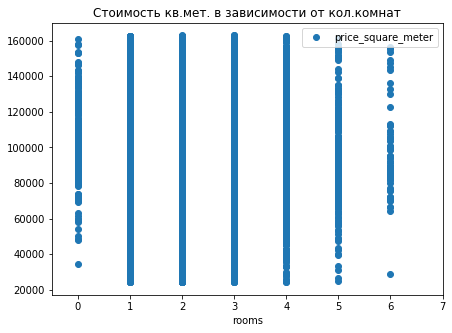

In [103]:
data_new.plot(x='rooms', y='price_square_meter', figsize=(7, 5), style='o', xlim=(-0.5,7), title='Стоимость кв.мет. в зависимости от кол.комнат')

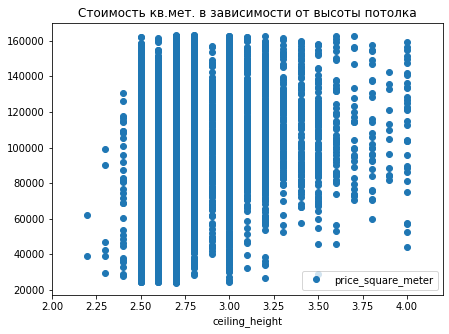

In [104]:
data_new.plot(x='ceiling_height', y='price_square_meter', figsize=(7, 5), style='o', xlim=(2,4.2), title='Стоимость кв.мет. в зависимости от высоты потолка')

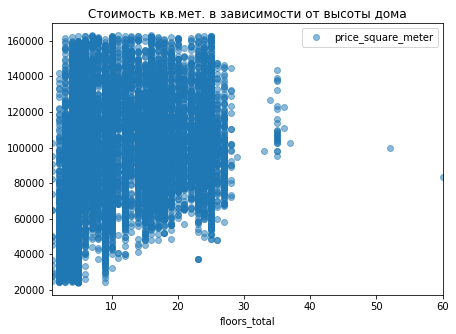

In [105]:
data_new.plot(x='floors_total', y='price_square_meter', figsize=(7, 5), style='o', alpha=0.5, title='Стоимость кв.мет. в зависимости от высоты дома')

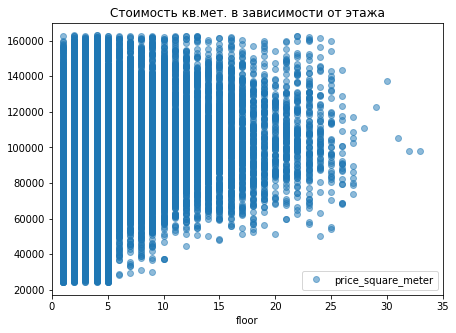

In [106]:
data_new.plot(x='floor', y='price_square_meter', figsize=(7, 5), style='o', alpha=0.5, xlim=(0,35),title='Стоимость кв.мет. в зависимости от этажа')

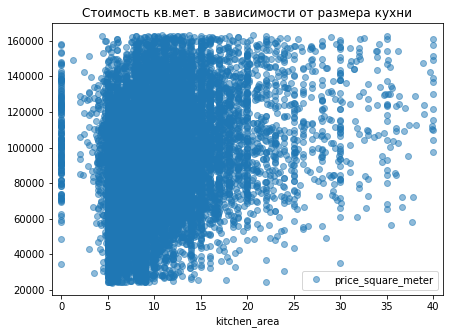

In [107]:
data_new.plot(x='kitchen_area', y='price_square_meter', figsize=(7, 5), style='o', alpha=0.5, xlim=(-1,41), title='Стоимость кв.мет. в зависимости от размера кухни')

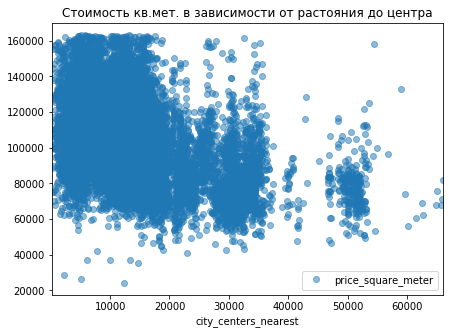

In [108]:
data_new.plot(x='city_centers_nearest', y='price_square_meter', figsize=(7, 5), style='o', alpha=0.5, title='Стоимость кв.мет. в зависимости от растояния до центра')

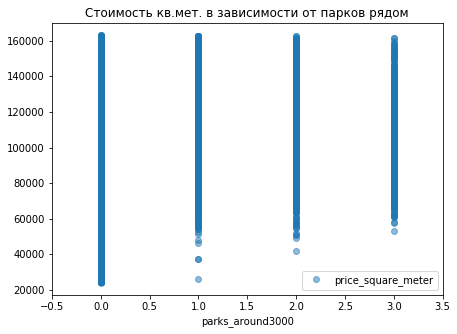

In [109]:
data_new.plot(x='parks_around3000', y='price_square_meter', xlim=(-0.5, 3.5), figsize=(7, 5), style='o', alpha=0.5, title='Стоимость кв.мет. в зависимости от парков рядом')

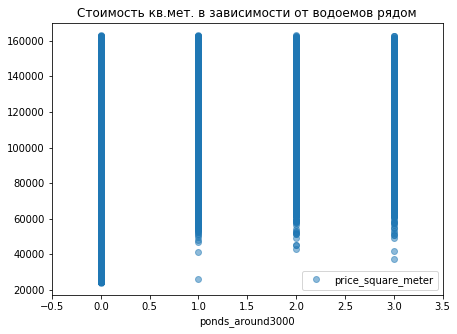

In [110]:
data_new.plot(x='ponds_around3000', y='price_square_meter', xlim=(-0.5, 3.5), figsize=(7, 5), style='o', alpha=0.5, title='Стоимость кв.мет. в зависимости от водоемов рядом')

price_square_meter имеет слабую корреляцию с:
- rooms(количество комнат). Корреляция очень слабая и отрицательная. С ростом стоимости квадратного метра, снижается количество комнат. Возможно это связано с тем, что в маленьких квартирах стоимость квадратного метра дороже. А в больших квартирах, с большим количеством комнат квадратный метр дешевле.
- ceiling_height(высота потолка). Корреляция слабоя, положительная. С ростом высоты потолка, растет стоимость квадратного метра.
- floors_total(количество этажей в доме). Корреляция небольшая положительная. В высоких домах квадратный метр дороже. Высокие дома стоят как правило в городах и в городах стоимоть квадратного метра выше.
- floor(этаж). Корреляция слабая. На первых этажах квадратный метр дешевле. Квартиры на высоком атаже, как правило расположены в городе, а в городах квадратный метр дороже.
- kitchen_area(площадь кухни). Корреляция слабая положительная. Квартиры с большой кухней дороже. Недорогих кварти с большой кухней очень мало.
- city_centers_nearest(растояние до центра города). Корреляция отрицательная. Чем дальше от центра города, тем дешевле квадратный метр. Большинство дорогих квартир расположены рядом с центром города.
- parks_around3000(количество парков в радиусе 3км). Корреляция положительная. Если есть поблизости парк, то стоимость квадратного метра растет. Самая недорогая стоимость квадратного метра, там где нет парков.
- ponds_around3000(количество водоемов в радиусе 3км). Корреляция положительная. Если есть поблизости водоём, то стоимость квадратного метра растет. Самая недорогая стоимость квадратного метра, там где нет водоемов.

**Анализ 10 населенных пунктов с наибольшим числом обьявлений**

10 населенных пунктов по максимальному количеству объявлений:

In [111]:
top_locality = data_new.groupby('locality_name')['last_price'].count().sort_values(ascending=False).reset_index().head(10)

In [112]:
top_locality

,locality_name,last_price
0,санкт-петербург,14099
1,посёлок мурино,509
2,посёлок шушары,429
3,всеволожск,380
4,пушкин,348
5,колпино,326
6,посёлок парголово,326
7,деревня кудрово,294
8,гатчина,293
9,выборг,232


Средняя стоимость квадратного метра по каждому населенному пункту.

In [113]:
print('Средняя стоимость квадратного метра в населенных пунктах:')
for town in top_locality.locality_name:
    square_meter = data.query('@town in locality_name')['price_square_meter'].mean()
    print(f'{town} - {square_meter}')

Средняя стоимость квадратного метра в населенных пунктах:
санкт-петербург - 114849.00879387381
посёлок мурино - 85752.18919485985
посёлок шушары - 78677.3642167513
всеволожск - 68654.4739860316
пушкин - 103125.81929072196
колпино - 75424.57909803945
посёлок парголово - 90175.91345801107
деревня кудрово - 92473.54757579972
гатчина - 68746.14676333922
выборг - 58141.90915331862


В Санкт-Петербурге самая высокая стоимость жилья, в среднем квадратный метр стоит 114849.

В Выборге самая низкая стоимость жилья, в среднем квадратный метр стоит 58142.

**Анализ изменения цены по степени удаленности от центра**

Для анализа возьму город Санкт-Петербург, так как там больше всего обьявлений.

In [114]:
data_new_spb = data_new[data_new.locality_name == 'санкт-петербург'].copy()

Создаю новую колонку *city_centers_nearest_kilometer* - растояние до центра города в километрах

In [115]:
data_new_spb['city_centers_nearest_kilometer'] = data_new_spb['city_centers_nearest'] / 1000

Округляю километры до целого числа. Что бы сгруппировать обьявления, находящиеся в одном километре, в одну группу.

In [116]:
data_new_spb['city_centers_nearest_kilometer'] = round(data_new_spb['city_centers_nearest_kilometer'])

Группирую объявления по количетсву километров от центра города и считаю среднее арифметическое стоимости квадратного метра.

In [117]:
price_per_kilometer = data_new_spb.groupby('city_centers_nearest_kilometer')['price_square_meter'].mean()

In [118]:
price_per_kilometer = price_per_kilometer.reset_index(drop=False)
price_per_kilometer.head(5)

,city_centers_nearest_kilometer,price_square_meter
0,0.0,111282.158557
1,1.0,114410.109843
2,2.0,110865.678111
3,3.0,109017.584385
4,4.0,111654.622961


График зависимости цены кватратного метра от расточния до центра города.

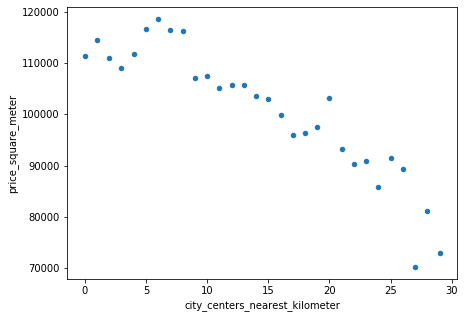

In [119]:
price_per_kilometer.plot(x='city_centers_nearest_kilometer', y='price_square_meter', kind='scatter', figsize=(7,5))

На графике четко видно, что чем дальше квартира от центра, тем стоимость квадратного метра ниже.

**Сравнение выводов по квартирам в центре и общих выводов по всему городу**

Радиус центра города 9 кл.

In [120]:
spb_centre = data_new_spb[data_new_spb.city_centers_nearest_kilometer <= 9]

Сначала нам нужно изучить параметры: площадь, цена, число комнат, высота потолков. Для этого стоит построить гистограммы признаков для центра города и остальных квартир и сравнить графики между собой

Гистограмма площади квартир.

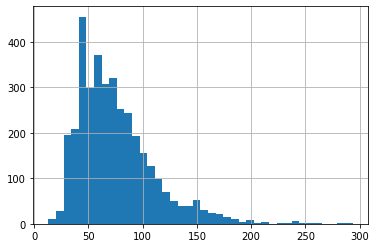

In [121]:
spb_centre['total_area'].hist(bins=40)

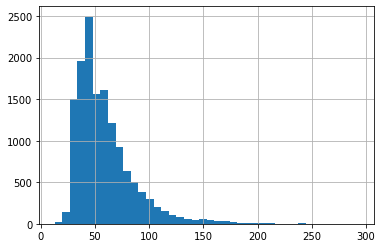

In [122]:
data_new_spb['total_area'].hist(bins=40)

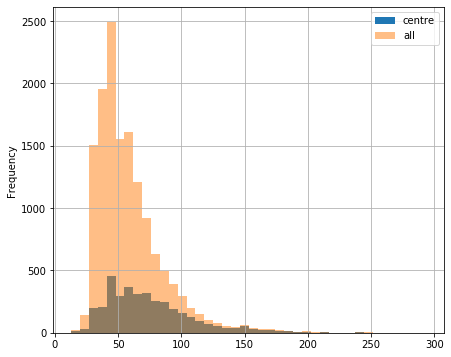

In [123]:
ax = spb_centre.plot(y='total_area', kind='hist', bins=40, linewidth=5, alpha=1,
                     label='centre', figsize=(7,6))

data_new_spb.plot(y='total_area', kind='hist', bins=40, linewidth=5, 
                     alpha=0.5, ax=ax, label='all', legend=True, grid=True, figsize=(7,6))

Квартиры с боьшой площадью, больше 140 кв.мет., в основном расположены в центре города.

Гистограмма цена за квадратный метр.

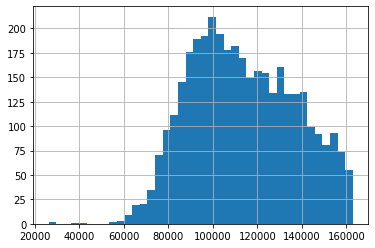

In [124]:
spb_centre['price_square_meter'].hist(bins=40)

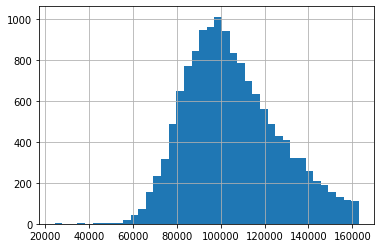

In [125]:
data_new_spb['price_square_meter'].hist(bins=40)

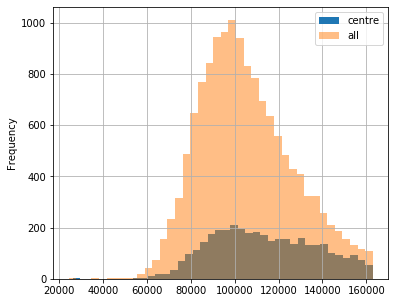

In [126]:
ax = spb_centre.plot(y='price_square_meter', kind='hist', bins=40, linewidth=5, alpha=1,
                     label='centre', figsize=(6,5))

data_new_spb.plot(y='price_square_meter', kind='hist', bins=40, linewidth=5, 
                     alpha=0.5, ax=ax, label='all', legend=True, grid=True, figsize=(6,5))

В центре города наиболее частая цена за квадратный метр немного выше чем по всему городу.

График средней стоимости за квардратный метр похоже на нормальное распределение. Это говорит, что крайние значения признака в нем встречаются достаточно редко, а значения, близкие к средней величине - достаточно часто. Значит по городу достаточно часто встречается 90000.

Если смотреть на график цена за квадратный метр в центре: левая часть похожа на нормальное распределение, т.е цены ниже 90000-10000 встречаются редко. А правая часть графика более плавная и резко не уходит вниз. Значит высокие цены за квадратный метр довольно часто встречаются.

Гистограмма числа комнат

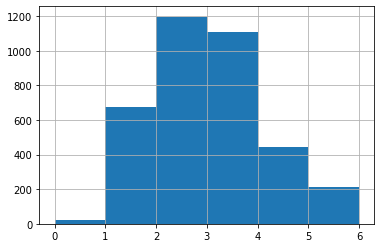

In [127]:
spb_centre['rooms'].hist(bins=6)

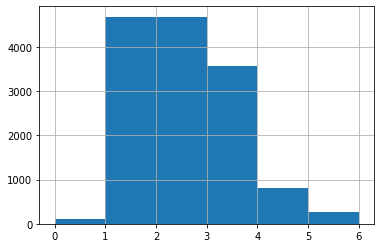

In [128]:
data_new_spb['rooms'].hist(bins=6)

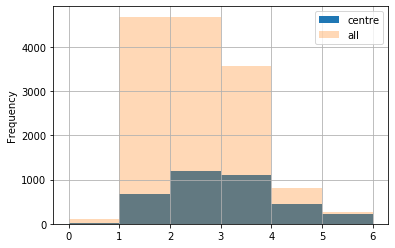

In [129]:
ax = spb_centre.plot(y='rooms', kind='hist', bins=6, linewidth=5, alpha=1,
                     label='centre')

data_new_spb.plot(y='rooms', kind='hist', bins=6, linewidth=5, 
                     alpha=0.3, ax=ax, label='all', legend=True, grid=True)

Большинсво продаваемых квартир в Санкт-Петербургу 2-3 комнатные. В центре это квартиры 3-4 комнатые.

Квартиры с большим количеством комнат 5-6 чаще расположены в центре города.

Гистограмма высоты потолка

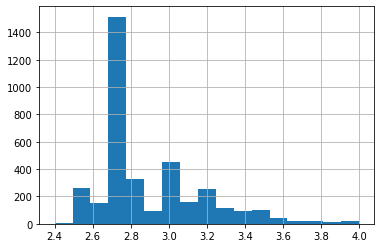

In [130]:
spb_centre['ceiling_height'].hist(bins=17)

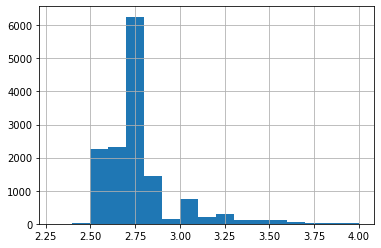

In [131]:
data_new_spb['ceiling_height'].hist(bins=17)

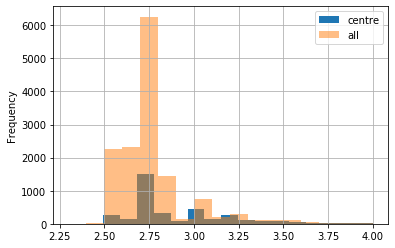

In [132]:
ax = spb_centre.plot(y='ceiling_height', kind='hist', bins=17, linewidth=5, alpha=1,
                     label='centre')
data_new_spb.plot(y='ceiling_height', kind='hist', bins=17, linewidth=5, 
                     alpha=0.5, ax=ax, label='all', legend=True, grid=True)

Во всем Санкт-Петербургк большинство квартир с высотой потолка 2.5-2.8 метра. Большая часть этих квартир расположена вне центра города.

Кравтиры с высоким потолком больше 3 метров в основном расположены в центре города.

In [133]:
# сводная таблица между этажем квартиры и ценой за квадратный метр в центре города
spb_centre.pivot_table(index=['flat_floor'], values='price_square_meter', aggfunc='mean')

,price_square_meter
flat_floor,
другой,115569.153482
первый,105682.051425
последний,110629.213401


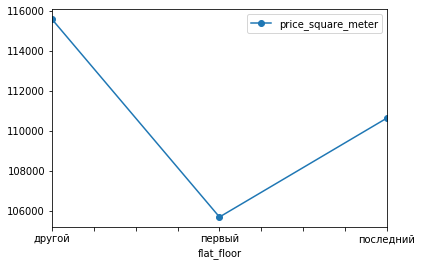

In [134]:
spb_centre.pivot_table(index=['flat_floor'], values='price_square_meter', aggfunc='mean').plot(style='-o')

In [135]:
# сводная таблица между этажем квартиры и ценой за квадратный метр по всему городу
data_new_spb.pivot_table(index=['flat_floor'], values='price_square_meter', aggfunc='mean')

,price_square_meter
flat_floor,
другой,107152.671145
первый,95523.095854
последний,102994.822430


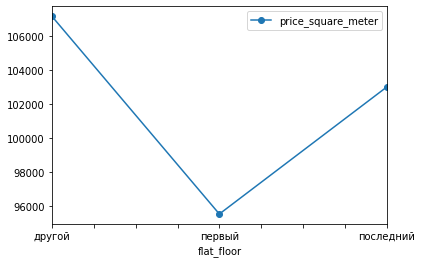

In [136]:
data_new_spb.pivot_table(index=['flat_floor'], values='price_square_meter', aggfunc='mean').plot(style='-o')

На первом этаже квартиры дешевле. 

На последнем этаже квартиры подороже, по сравнению с первым.

Между первым и последним этажем самые дорогие квартиры.

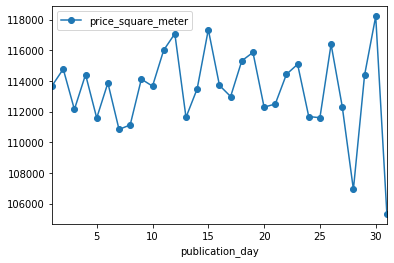

In [137]:
# стоимость квадратного метра в центре города в зависимости от дня месяца.
spb_centre.pivot_table(index='publication_day', values='price_square_meter', aggfunc='mean').plot(style='-o')

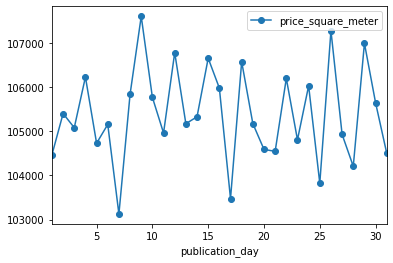

In [138]:
# стоимость квадратного метра по всему городу в зависимости от дня месяца.
data_new_spb.pivot_table(index='publication_day', values='price_square_meter', aggfunc='mean').plot(kind='line', style='-o')

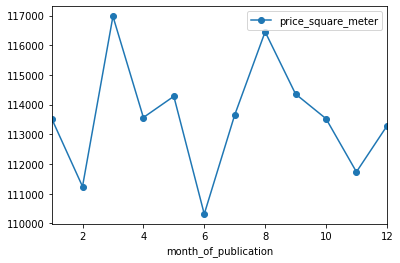

In [139]:
# стоимость квадратного метра в центре города в зависимости от месяца.
spb_centre.pivot_table(index='month_of_publication', values='price_square_meter', aggfunc='mean').plot(style='-o')

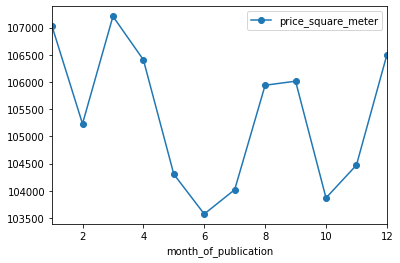

In [140]:
# стоимость квадратного метра по всему городу в зависимости от  месяца.
data_new_spb.pivot_table(index='month_of_publication', values='price_square_meter', aggfunc='mean').plot(kind='line', style='-o')

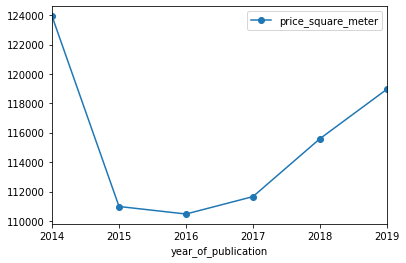

In [141]:
# стоимость квадратного метра в центре города в зависимости от года.
spb_centre.pivot_table(index='year_of_publication', values='price_square_meter', aggfunc='mean').plot(style='-o')

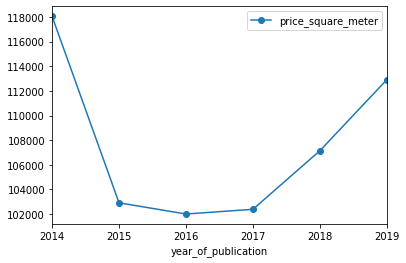

In [142]:
# стоимость квадратного метра по всему городу в зависимости от  года.
data_new_spb.pivot_table(index='year_of_publication', values='price_square_meter', aggfunc='mean').plot(kind='line', style='-o')

В феврале цена квартиры начинает падать, потом цена до марта растет. Потом опять падает до июня и в июне наблюдается самая низкая цена за квадратный метр квартиры. Потом цена опять растет, падает и в декабре наблюдается высокие цены за квартиры.

После 2014 года квартиры в цене падают, примерно на 10 000. Это падение держалось 2015-2017 год и к 2019 цена на квартиры росла.

In [143]:
# корреляция 'price_square_meter' с другими характеристиками по центру города
spb_centre.corr()['price_square_meter']

total_images                      0.110056
last_price                        0.332213
total_area                       -0.111942
rooms                            -0.284341
ceiling_height                   -0.016480
floors_total                      0.281332
living_area                      -0.198412
floor                             0.240283
is_apartment                      0.062555
studio                            0.037979
open_plan                         0.025378
kitchen_area                      0.136743
balcony                           0.177132
airports_nearest                  0.029948
city_centers_nearest              0.002172
parks_around3000                 -0.018181
parks_nearest                     0.100958
ponds_around3000                  0.092008
ponds_nearest                     0.001189
days_exposition                   0.007988
price_square_meter                1.000000
publication_day                  -0.007229
month_of_publication             -0.006228
year_of_pub

In [144]:
# корреляция 'price_square_meter' с другими характеристиками по всему городу
data_new_spb.corr()['price_square_meter']

total_images                      0.127337
last_price                        0.411448
total_area                       -0.010133
rooms                            -0.236689
ceiling_height                    0.181090
floors_total                      0.218425
living_area                      -0.110781
floor                             0.181440
is_apartment                      0.031224
studio                            0.049416
open_plan                         0.030938
kitchen_area                      0.229300
balcony                           0.055398
airports_nearest                  0.008149
city_centers_nearest             -0.270929
parks_around3000                  0.076147
parks_nearest                     0.068558
ponds_around3000                  0.095585
ponds_nearest                    -0.041889
days_exposition                   0.019187
price_square_meter                1.000000
publication_day                   0.003530
month_of_publication             -0.021654
year_of_pub

На стоимость квадратного метра влияет:
- количество комнат, чем больше конат, тем ниже цена.
- высота потолка, чем выше потолок, тем выше цена, это влияние распределено по всему городу, в центре оно не значительное.
- жилая площадь, чем больше жилая площадь, тем ниже цена, в центре города это влияние сильнее.
- этаж, выше этаж, выше цена
- высота здания, у высоких зданий, цена за кв.метр больше.
- размер кухни, больше кухня, больше цена
- балкон, в центре количество болконов оказывает больше влияния на цену квартиры.
- растояние до центра города, дальше от центра, ниже цена за квадратный метр.

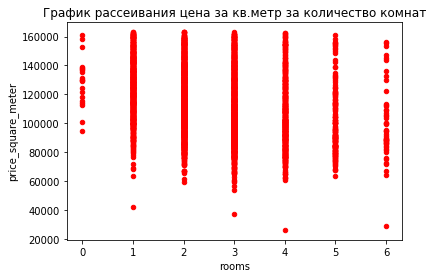

In [145]:
# график рассеивания количество комнат и цена за кв.метр в центре города.
spb_centre.plot(x='rooms', y='price_square_meter', kind='scatter', color='red', 
                title='График рассеивания цена за кв.метр за количество комнат')

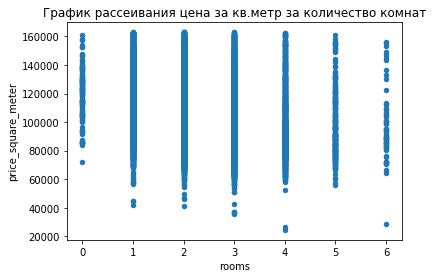

In [146]:
# график рассеивания количество комнат и цена за кв.метр по всему городу.
data_new_spb.plot(x='rooms', y='price_square_meter', kind='scatter', 
                  title='График рассеивания цена за кв.метр за количество комнат')

Видно, что там где есть комнаты, в этих квартирах есть самые низкие цены за кв.метр. Там где нет комнат цены не опускаются ниже минимальных.

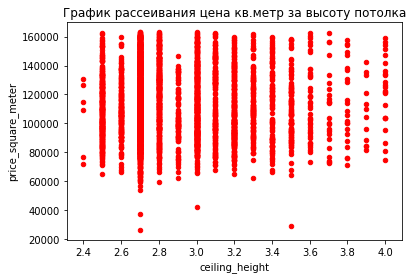

In [147]:
# график рассеивания высоты потолка и цена за кв.метр в центре города.
spb_centre.plot(x='ceiling_height', y='price_square_meter', kind='scatter', color='red', 
                title='График рассеивания цена кв.метр за высоту потолка')

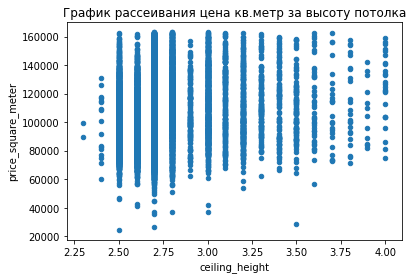

In [148]:
# график рассеивания высоты потолка и цена за кв.метр по всему городу.
data_new_spb.plot(x='ceiling_height', y='price_square_meter', kind='scatter', 
                  title='График рассеивания цена кв.метр за высоту потолка')

По всему городу можно увидеть, что при росте высоты потолка, растет и цена за кв.метр.

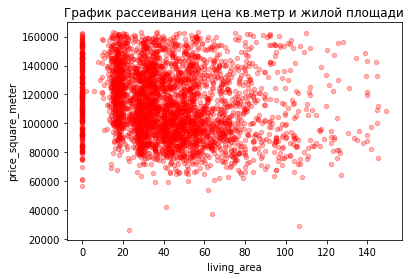

In [149]:
# график рассеивания жилой площади и цена за кв.метр в центре города.
spb_centre.plot(x='living_area', y='price_square_meter', kind='scatter', alpha=0.3, color='red', 
                title='График рассеивания цена кв.метр и жилой площади')

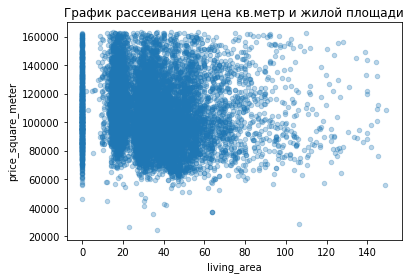

In [150]:
# график рассеивания жилой площади и цена за кв.метр по всему городу.
data_new_spb.plot(x='living_area', y='price_square_meter', kind='scatter',alpha=0.3,  
                  title='График рассеивания цена кв.метр и жилой площади')

Самые дорогие квартиры, те, у которых не большая площадь. У квартир с большой площадью (за 120 кв.метра), цена квадратного метра уменьшается.

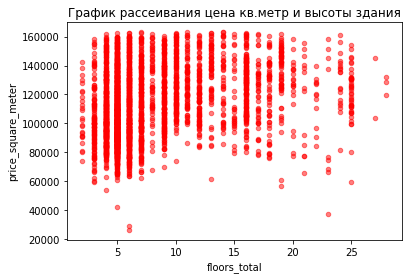

In [151]:
# график рассеивания высоты здания и цена за кв.метр в центре города.
spb_centre.plot(x='floors_total', y='price_square_meter', kind='scatter', alpha=0.5, color='red', 
                title='График рассеивания цена кв.метр и высоты здания')

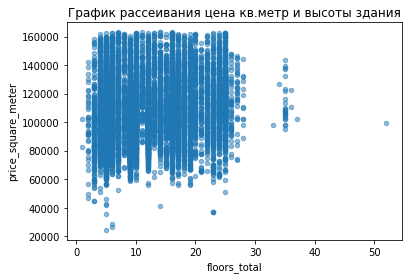

In [152]:
# график рассеивания высоты здания и цена за кв.метр по всему городу.
data_new_spb.plot(x='floors_total', y='price_square_meter', kind='scatter',alpha=0.5,  
                  title='График рассеивания цена кв.метр и высоты здания')

При росте здания, растет цена за кв.метр

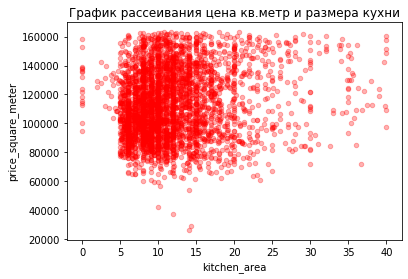

In [153]:
# график рассеивания размера кухни и цена за кв.метр в центре города.
spb_centre.plot(x='kitchen_area', y='price_square_meter', kind='scatter', alpha=0.3, color='red', 
                title='График рассеивания цена кв.метр и размера кухни')

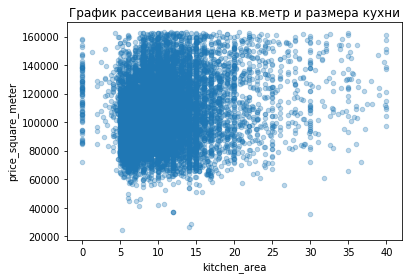

In [154]:
# график рассеивания размера кухни и цена за кв.метр по всему городу.
data_new_spb.plot(x='kitchen_area', y='price_square_meter', kind='scatter',alpha=0.3,  
                  title='График рассеивания цена кв.метр и размера кухни')

При росте площади кухни, растет цена за кв.метр.

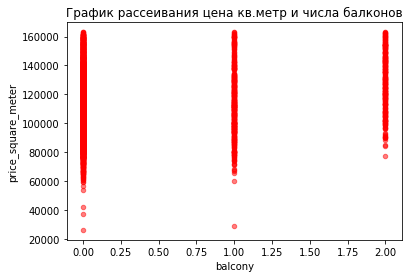

In [155]:
# график рассеивания числа балконов и цена за кв.метр в центре города.
spb_centre.plot(x='balcony', y='price_square_meter', kind='scatter', alpha=0.5, color='red', 
                title='График рассеивания цена кв.метр и числа балконов')

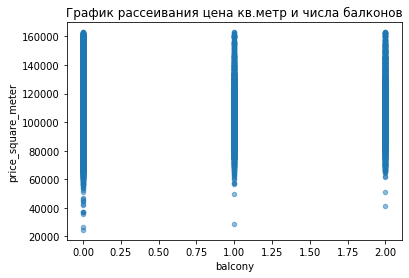

In [156]:
# график рассеивания числа балконов и цена за кв.метр по всему городу.
data_new_spb.plot(x='balcony', y='price_square_meter', kind='scatter',alpha=0.5,  
                  title='График рассеивания цена кв.метр и числа балконов')

В центре города наличие балкона больше влияет на цену квартиры. Если есть балкон, то квадратные метр дороже.

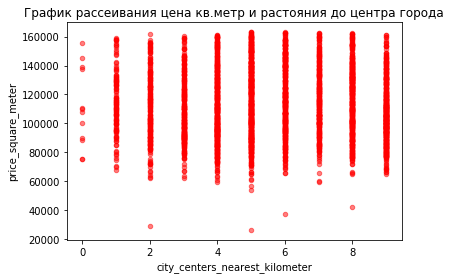

In [157]:
# график рассеивания растояния до центра города и цена за кв.метр в центре города.
spb_centre.plot(x='city_centers_nearest_kilometer', y='price_square_meter', kind='scatter', alpha=0.5, color='red', 
                title='График рассеивания цена кв.метр и растояния до центра города')

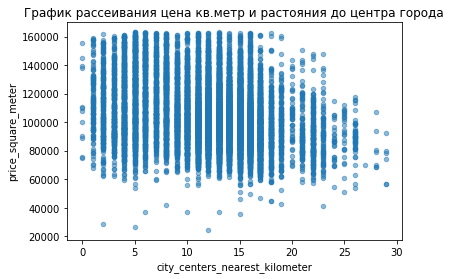

In [158]:
# график рассеивания растояния до центра города и цена за кв.метр по всему городу.
data_new_spb.plot(x='city_centers_nearest_kilometer', y='price_square_meter', kind='scatter',alpha=0.5,  
                  title='График рассеивания цена кв.метр и растояния до центра города')

Чем дальше от центра города, тем дешевле квартира.

In [159]:
spb_centre.pivot_table(index='rooms', values='price_square_meter', aggfunc='median')

,price_square_meter
rooms,
0,130000.000000
1,125272.774061
2,113452.188006
3,106512.662692
4,101025.641026
5,93895.347052
6,93384.779038


In [160]:
data_new_spb.pivot_table(index='rooms', values='price_square_meter', aggfunc='median').reset_index(drop=False)

,rooms,price_square_meter
0,0,121875.000000
1,1,109677.419355
2,2,101863.207547
3,3,94663.390266
4,4,93242.272093
5,5,91709.464417
6,6,93154.995751


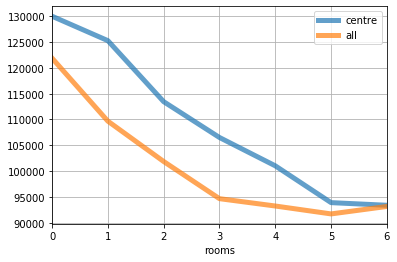

In [161]:
ax = spb_centre.pivot_table(index='rooms', values='price_square_meter', aggfunc='median').reset_index(
    drop=False).plot(x='rooms', y='price_square_meter', linewidth=5, alpha=0.7, label='centre')

data_new_spb.pivot_table(index='rooms', values='price_square_meter', aggfunc='median').reset_index(drop=False).plot(x='rooms', y='price_square_meter', linewidth=5, alpha=0.7, ax=ax,label='all', legend=True, grid=True)

В центре квартиры с 1-5 комнатми дороже чем по всему городу. Но с увеличением площади средняя стоимость квадратного метра выравнивается. И уже квартиры с 6ю комнатами стоят примерно одинаково и в центре, и во всем городе.

Выводы:
- В Санкт-Петербурге самая высокая стоимость жилья, в среднем квадратный метр стоит 114849.
- В Выборге самая низкая стоимость жилья, в среднем квадратный метр стоит 58142.
- Квартиры с боьшой площадью, больше 140 кв.мет., в основном расположены в центре города.
- В центре города наиболее частая цена за квадратный метр немного выше чем по всему городу.
- Большинсво продаваемых квартир в Санкт-Петербургу 2-3 комнатные. В центре это квартиры 3-4 комнатые.
- Квартиры с большим количеством комнат 5-6 чаще расположены в центре города.
- На первом этаже квартиры дешевле. 
- На последнем этаже квартиры подороже, по сравнению с первым.
- Между первым и последним этажем самые дорогие квартиры.
- Чем больше конат, тем ниже цена.
- Чем выше потолок, тем выше цена, это влияние распределено по всему городу, в центре оно не значительное.
- Чем больше жилая площадь, тем ниже цена, в центре города это влияние сильнее.
- Выше этаж, выше цена
- У высоких зданий, цена за кв.метр больше.
- Больше кухня, больше цена
- В центре количество болконов оказывает больше влияния на цену квартиры.
- Чем дальше от центра, тем ниже цена за квадратный метр.


## Общий вывод

На цену квартиры влияет:
- rooms(количество комнат). С ростом стоимости квадратного метра, снижается количество комнат. Небольшие квартиры самые востребованные и квадратный метр у них дороже. А в больших квартирах, с большим количеством комнат квадратный метр дешевле.
Количество комнат неразрывно связано с площадью квартиры.
- ceiling_height(высота потолка). Эта взаимоствязь наблюдается по всему городу, в центре не так сильно выражена. С ростом высоты потолка, растет стоимость квадратного метра.
- floors_total(количество этажей в доме). В высоких домах квадратный метр дороже.
- floor(этаж). На первых этажах квадратный метр дешевле всего. Видимо потому что первые этажи не безопасные и с улицы идет постоянный шум. Квартиры на последний этажах немного дороже, по сравнению с первым. И самые дорогие квартиры между первым и последним этажом.
- kitchen_area(площадь кухни). Квартиры с большой кухней дороже. 
- city_centers_nearest(растояние до центра города). Чем дальше от центра города, тем дешевле квадратный метр. Большинство дорогих квартир расположены в центре города.
- parks_around3000(количество парков в радиусе 3км). Если есть поблизости парк, то стоимость квадратного метра растет. Самая недорогая стоимость квадратного метра, там где нет парков.
- ponds_around3000(количество водоемов в радиусе 3км). Если есть поблизости водоём, то стоимость квадратного метра растет. Самая недорогая стоимость квадратного метра, там где нет водоемов.
- в центре города Санкт-Петербурга на цену квадратного метра влияет наличие балкона.

В датасете были представлены объявления по продажам квартир за 2014-2019 год:
- в 2014 году цена за квадратный метр была максимальной
- к 2015 цена упала и держалась в этом положении 2 года
- после 2017 цена начала расти

В конце 2014 Россия присоединила Крым, после этого против России выдвинули санкции, рубыль упал, начался кризис и это повлияло на стоимость квартир. Все это продлилось до 2017 года.

- падение цены наблюдается в феврале, июне. В июне самая низкая цена на квартиры.
- пик стоимости приходиться на март, январь.

В датасете был представлен город Санкт-Петербург и города, посетки, деревни вокруг него.
Самые дорогие квартиры были в городе Санкт-Петербург - это административный центр. В других городах, поселках квартиры дешевле.